# Import 

In [2]:
import torch
import torch.nn as nn
from metrics import Cross_validation
from architecture import *
from dlc_practical_prologue import generate_pair_sets as load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the architectures and parameters

In [48]:
# List of the architectures you want to assess
architectures = [LugiaNet]
# List of the arguments for each architecture
args = [[3]]
# Initialize the cross validation
mytest = Cross_validation(architectures,args,epochs=100,steps=5,runs=1) 

In [49]:
mytest.count_params()

In [50]:
mytest.archi_names

['LugiaNet (3)']

# Run the network

In [52]:
mytest.run_all(test=True,save_data="_weight_loss")

Architecture        Runs           Accuracy Train           Accuracy Test            Time           
------------        ----           --------------           -------------            ----           


IndexError: list index out of range

In [41]:
error_idx=5
for error_idx in range(0,10):
    mytest.plot_errors(error_idx)

IndexError: index 0 is out of bounds for dimension 0 with size 0

# Visualize the spread of the accuracy

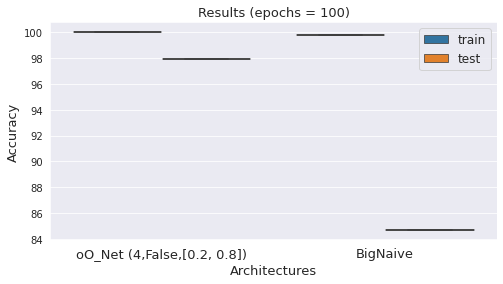

In [42]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_std(fig,[1,1,1],test=True)

# Compare the performances

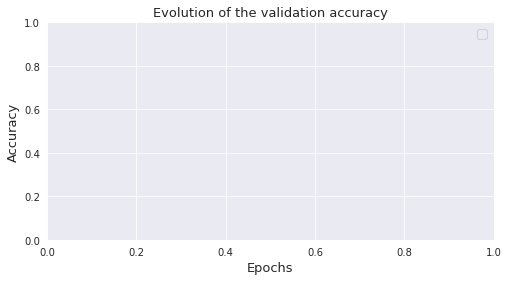

In [43]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_evolution_all(fig,[1,1,1],type_perf=1)

# Visualize the time performances

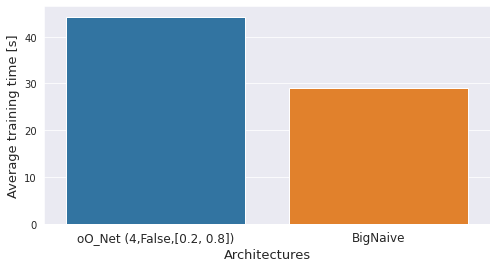

In [44]:
fig = plt.figure(figsize=[8,4])
sns.set_style("darkgrid")
mytest.plot_time_comparison(fig,[1,1,1])

# Let's plot all these graphs together

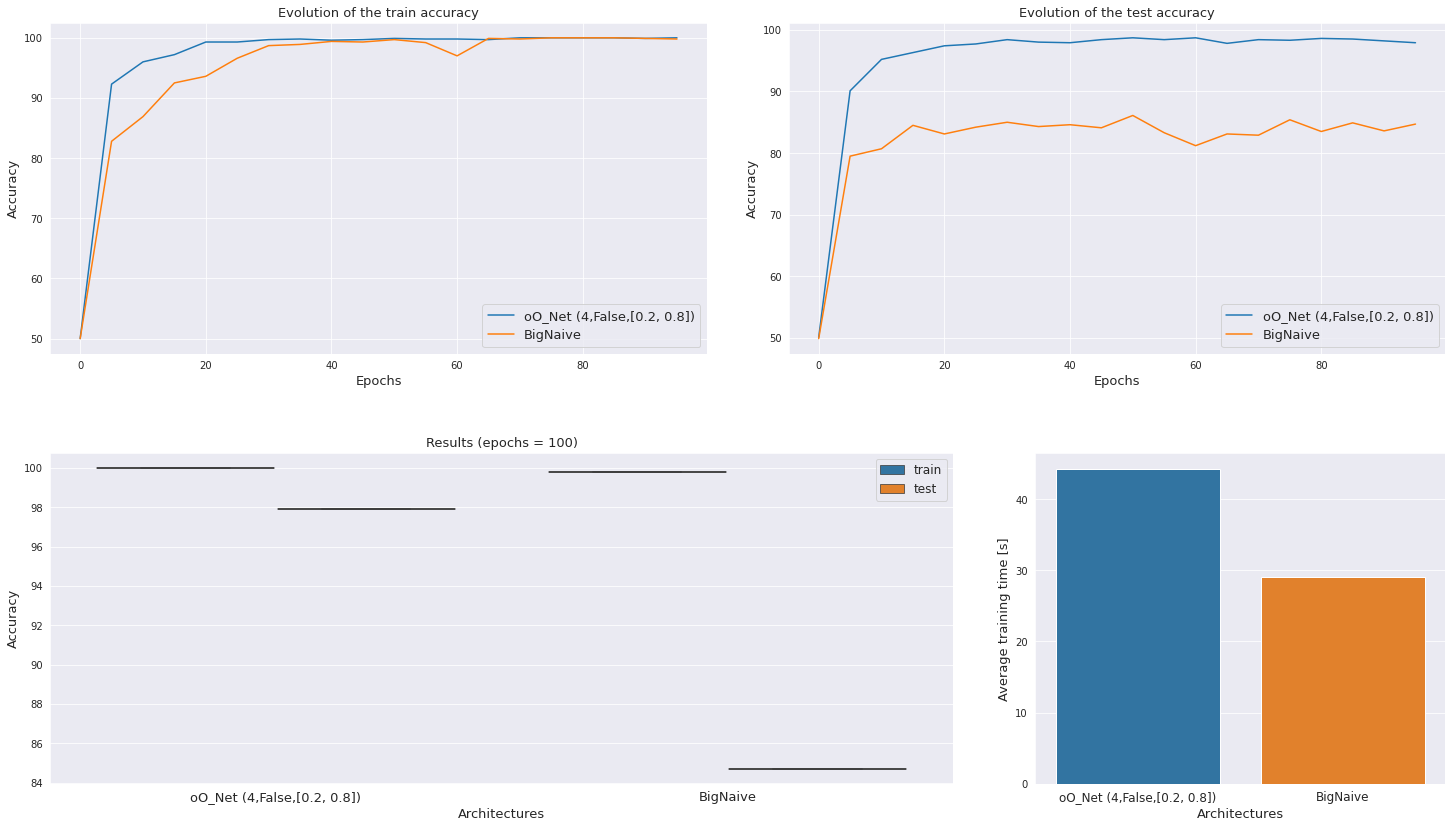

In [45]:
mytest.plot_full_comparison(test=True,save_folder="figures/")

In [46]:
model=oO_Net()
model.load_state_dict(torch.load('model/oO_Net (4,False,[0.2, 0.8])_weights.pth'))
model.eval()

oO_Net(
  (Mnist_part): Sequential(
    (0): Conv2d(1, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.65, inplace=False)
    (5): Conv2d(96, 48, kernel_size=(2, 2), stride=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Dropout(p=0.25, inplace=False)
    (9): Conv2d(48, 32, kernel_size=(2, 2), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.25, inplace=False)
    (14): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (15): ReLU()
    (16): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [47]:

mysve = Cross_validation(architectures,args) 

train_input, train_target, train_classes ,test_input ,test_target ,test_classes=mysave.split_data()

accuracy_test = mysve.accuracy(model,test_input,test_target,test_classes)
print(accuracy_test)


97.39999999999999


## Remarks on oO_Net

Dropout in the Naive_Net part reduces overfitting significantly and increases performance by 1%. <br>
Dropout in MnistCNN decreases performance. <br>
Replacing MnistCNN by a Mnist ResNet decreases performance. <br>
SELU has no effect on performance and increases running time. <br>
weights_loss is good at [0.5, 0.5]. <br>
data_augmentation n'est pas pertinent. <br>
erreur plausible pour bcp. <br>
bcp de train donne un bon resultat, moyenne a 87.6 avec 80 epoch, a l'air de monter encore un peu. <br>
